# Python wrapper to process and visualize simulated signals
- Load simulation data from SPECFEM folders
- Create signals from full moment tensor solutions from fundamental moment tensor simulations
- Visualize timeseries
- Extract group velocity curves
- Extract TL curves

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import os
import obspy # obspy 1.3.1
from obspy.core.utcdatetime import UTCDateTime
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import ifft, fft, fftfreq
import seaborn as sns # seaborn 0.11.1
import tqdm
from importlib import reload;
from pyrocko import moment_tensor as mtm

import process_SPECFEM_modules as psm

## Load current atmospheric model (useful to compute average acoustic velocities)

In [2]:
file_atmos_JPL = './test_data_Venus/atmospheric_model_updated.dat'
altitude_balloon = 52.
atmos_JPL = pd.read_csv(file_atmos_JPL, header=[0], delim_whitespace=True)
atmos_JPL.loc[atmos_JPL['z[m]']<=altitude_balloon*1e3, 'c[m/s]'].median()

354.3791326

## Load simulation data

In [28]:
reload(psm)
dir_specfem = '../../EXAMPLES/'
folder_specfem = 'EXAMPLES/simulation_Dirac_dx270_dt0.0054_crust11km_M2'
#folder_specfem = 'EXAMPLES/simulation_Dirac_dx270_dt0.0054_crust11km_M2'
#folder_specfem = 'EXAMPLES/simulation_Dirac_dx270_dt0.0054_crust25km_M2'
#folder_specfem = 'EXAMPLES/firstrun_simulation_Dirac_dx270_dt0.0054_crust11km_200km_zs10km_M1'

## To create full moment tensor results from fundamental ones 
base_folders_specfem = 'simulation_Dirac_dx270_dt0.0054_crust25km_'
folders_combinaisons = {}
factors_combine_mt = {}

build_full_mt = False
if build_full_mt:
    for mt in ['M1', 'M2', 'M3']:
        folders_combinaisons[mt] = f'{dir_specfem}{base_folders_specfem}{mt}'

    mt_target = {'Mrr': 3.77,
     'Mrt': -0.63,
     'Mrp': 0.06,
     'Mtt': -1.83,
     'Mtp': 1.55,
     'Mpp': -1.94}
    factors_combine_mt = psm.get_coefs_fundamental_mt(mt_target)

## Requested stations/networks
#station = '_s0'
station = 'BL'
starttime = UTCDateTime(2022,1,14)

mw = 7.
f0 = 1./(1.5e-8*(mtm.magnitude_to_moment(mw)*1e7)**(1./3.))
f0 = 0.5
print(f'Frequency {f0} Hz')
options_waveform = dict(
    folder_waveform = f'{dir_specfem}{folder_specfem}',
    folders_combine_mt = folders_combinaisons,
    factors_combine_mt = factors_combine_mt,
    file_waveform = f'{station}',
    remove_stations = ['BXX', ] + [f'balloon{nb}' for nb in [4,1,2,3,5,6]],# + ['BL'],
    load_all_waveforms_in_folder = False,
    no_post_processing=False,
    target_sampling=10., 
    max_percentage=0.01, 
    freq_max=10., 
    freq_min=1e-3,
    starttime=starttime,
    geo_scaling=True,
    vel_acoustic=0.34,
    vel_seismic=4.5,
    alpha_geo=0.05,
    norm_factor_specfem=1e8,
    remove_time_offset_SPECFEM=False,
    stf={'type': 'gaussian', 'f0': f0,}
    #stf={}
)
waveform_data = psm.create_waveforms(**options_waveform)

Frequency 0.5 Hz


  0%|          | 0/3 [00:00<?, ?it/s]

0.11031769494701771
0.04340000317366447


/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/numpy/core/_asarray.py:109: ComplexWarning: Casting complex values to real discards the imaginary part
  return asanyarray(a, dtype=dtype)


0.04167449970469841
0.04013968802080067
0.03876284847287478
0.03751861770039897
0.036386990239723534
0.035351945958895
0.03440048414962567
0.033521929151642385
0.03270742167696457
0.0887205183813437
0.07626761295393251
0.06791708141417342
0.06181969660373361
0.05711587745037539
0.05334464567393388
0.05023366364213495


100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

0.04761033370831514
0.045359266420310865
Number of stations loaded: 20


In [31]:
network = 'GS'
options_waveform['file_waveform'] = f'{network}'
options_waveform['remove_stations'] = ['BXX', 'ground_above']
waveform_data_seismic = psm.create_waveforms(**options_waveform)

  0%|          | 0/3 [00:00<?, ?it/s]/staff/quentin/miniconda2/envs/seismonpy/lib/python3.7/site-packages/numpy/core/_asarray.py:109: ComplexWarning: Casting complex values to real discards the imaginary part
  return asanyarray(a, dtype=dtype)


0.06676018409757115
0.0545094620577724
0.04720657888865486
0.04222284775209548
0.038544010259881634


100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

0.035684819424437825
0.033380092048785476
Number of stations loaded: 7


## Visualize timeseries

<IPython.core.display.Javascript object>


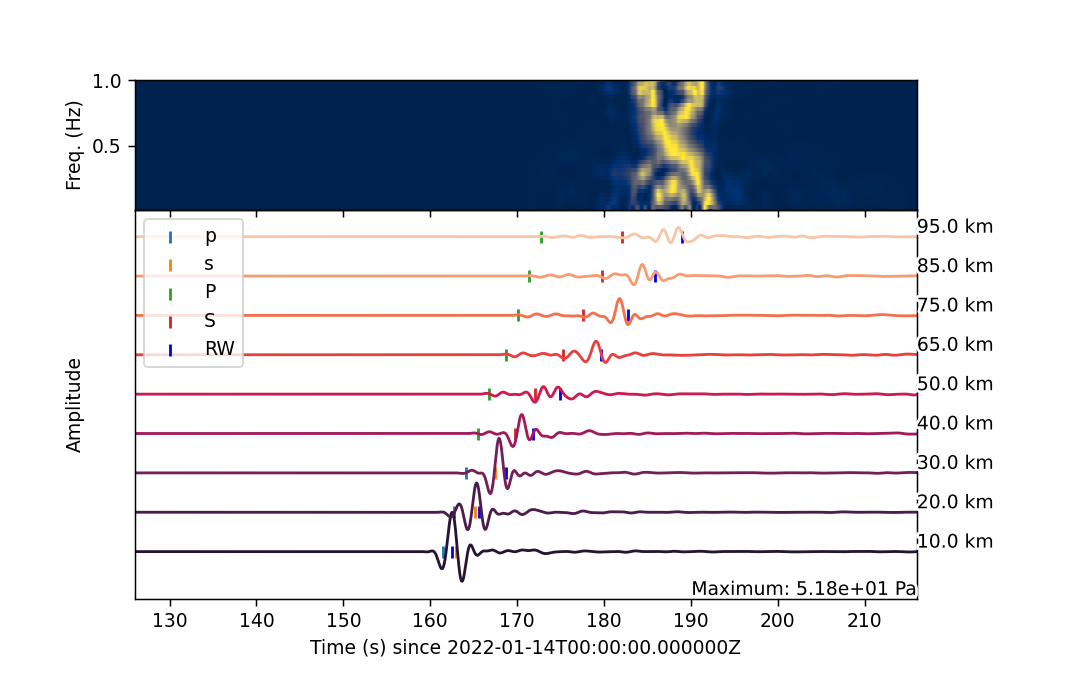

balloon0_1_s0 9.999999999367784 55.0 0.345 159.42028985507247
balloon0_3_s0 19.999999998735518 55.0 0.345 159.42028985507247
balloon0_5_s0 29.999999998103263 55.0 0.345 159.42028985507247
balloon0_7_s0 39.99999999747103 55.0 0.345 159.42028985507247
balloon0_9_s0 49.999999996838824 55.0 0.345 159.42028985507247
balloon0_12_s0 64.99999999589052 55.0 0.345 159.42028985507247
balloon0_14_s0 74.99999999525835 55.0 0.345 159.42028985507247
balloon0_16_s0 84.99999999462624 55.0 0.345 159.42028985507247
balloon0_18_s0 94.99999999399422 55.0 0.345 159.42028985507247


/staff/quentin/Documents/Projects/2023_Celine_internship/msc_celine_specfem/utils/utils_NORSAR/process_SPECFEM_modules.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phases.sort_values(by='time', inplace=True)
/staff/quentin/Documents/Projects/2023_Celine_internship/msc_celine_specfem/utils/utils_NORSAR/process_SPECFEM_modules.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phases.sort_values(by='time', inplace=True)
/staff/quentin/Documents/Projects/2023_Celine_internship/msc_celine_specfem/utils/utils_NORSAR/process_SPECFEM_modules.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [29]:
reload(psm)
nperseg  = 128//2
all_arrivals = pd.read_csv('./test_data_Venus/seismic_phases.csv', header=[0])
source_depth, crustal_depth = 10., 11.
opt_display = dict(
    all_arrivals=all_arrivals.loc[(abs(all_arrivals.source_depth-source_depth)==abs(all_arrivals.source_depth-source_depth).min()) &
                                 (abs(all_arrivals.crustal_depth-crustal_depth)==abs(all_arrivals.crustal_depth-crustal_depth).min())], 
    figsize=(8,5), 
    normalize_individual_waveform=False, 
    use_rel_time=-1, 
    time_min=176.-50., 
    time_max=216., 
    sort_by_distance=True, 
    freq_min=1e-2, 
    freq_max=1, 
    id_Sxx=-1, 
    q_display=-1, 
    nperseg=nperseg, 
    noverlap=nperseg-1, 
    nfft=nperseg*5, 
    #vel_IS=0.351,
    vel_IS=0.345,
    show_only_km_label=True, 
    normalize_spectro_per_freq=True
)
psm.plot_waveforms(waveform_data[3::2], **opt_display)

In [30]:
all_arrivals.loc[(abs(all_arrivals.source_depth-source_depth)==abs(all_arrivals.source_depth-source_depth).min()) &
                                 (abs(all_arrivals.crustal_depth-crustal_depth)==abs(all_arrivals.crustal_depth-crustal_depth).min())]

,source_depth,crustal_depth,phase,time,time_UTC,distance,id_distance,ray_distance
4,9.736842,11.0,p,1.475490,2022-01-03T21:25:34.725490Z,1.111949,0,19.537189
5,9.736842,11.0,s,2.522713,2022-01-03T21:25:35.772713Z,1.111949,0,19.537199
44,9.736842,11.0,p,1.503571,2022-01-03T21:25:34.753571Z,2.223899,1,19.725311
45,9.736842,11.0,s,2.570716,2022-01-03T21:25:35.820716Z,2.223899,1,19.725353
84,9.736842,11.0,p,1.549228,2022-01-03T21:25:34.799228Z,3.335848,2,20.031317
...,...,...,...,...,...,...,...,...
7885,9.736842,11.0,S,51.168246,2022-01-03T21:26:24.418246Z,220.165955,197,233.067043
7924,9.736842,11.0,P,30.147963,2022-01-03T21:26:03.397963Z,221.277904,198,234.213100
7925,9.736842,11.0,S,51.420342,2022-01-03T21:26:24.670342Z,221.277904,198,234.166242
7964,9.736842,11.0,P,30.295693,2022-01-03T21:26:03.545693Z,222.389853,199,235.313644


In [ ]:
reload(psm)
nperseg  = 128//2
all_arrivals = pd.read_csv('./test_data_Venus/seismic_phases.csv', header=[0])
opt_display = dict(
    all_arrivals=all_arrivals.loc[abs(all_arrivals.source_depth-10.)==abs(all_arrivals.source_depth-10.).min()], 
    figsize=(9,5), 
    normalize_individual_waveform=False, 
    use_rel_time=-1, 
    time_max=90., 
    sort_by_distance=True, 
    freq_min=1e-2, 
    freq_max=0.7, 
    id_Sxx=-1, 
    q_display=-1, 
    nperseg=nperseg, 
    noverlap=nperseg-1, 
    nfft=nperseg*5, 
    vel_IS=0.34,
    show_only_km_label=True, 
    normalize_spectro_per_freq=True
)
psm.plot_waveforms(waveform_data_seismic[1:], **opt_display)

## FTAN analysis

In [ ]:
reload(psm)

periods = np.linspace(1./options_waveform['freq_max'], min(20.,1./options_waveform['freq_min']), 100)
vels = np.linspace(2., 5., 110)
id = 5
l_distance_acoustic = [tr.stats.distance for tr in waveform_data]
id_acoustic = np.argsort(l_distance_acoustic)
l_distance_seismic = [tr.stats.distance for tr in waveform_data_seismic]
id_seismic = np.argsort(l_distance_seismic)
waveform = waveform_data[id_acoustic[id]].copy()
#waveform = waveform_data_seismic[id_seismic[id]].copy()

file_noise = './test_data_Venus/spectrum_noise.csv'
pd_F = pd.read_csv(file_noise, header=[0])
tr_noise = psm.generate_noise_timeseries(pd_F, waveform.times()[-1], 1./periods.max(), 1./periods.min(), dt_new=waveform.stats.delta, scale=1)
waveform.data += tr_noise.data*0.5

vel_acoustic = 0.341
window_around_arrival={}
#window_around_arrival = {'time': 20., 'duration': 30., 'taper': 0.1}
#time_data, toffset_atmos, data, vgcurve, misfit, ampl_resampled, ampl_resampled_orig = psm.extract_dispersion_curve(waveform, periods, vels, alpha=2., max_percentage=0.4, vg0='disba', trim_after=50., window_around_arrival=window_around_arrival, norm_ftan=True, vel_acoustic=vel_acoustic)
window_around_arrival={}
time_data, toffset_atmos, data, vgcurve, misfit, ampl_resampled, ampl_resampled_orig = psm.extract_dispersion_curve(waveform, periods, vels, alpha=2., max_percentage=0.1, vg0=None, trim_after=230., window_around_arrival=window_around_arrival, norm_ftan=True, vel_acoustic=vel_acoustic)
psm.plot_ftan(waveform, time_data, toffset_atmos, data, periods, vels, vgcurve, ampl_resampled, ampl_resampled_orig, figsize=(5,3), norm_ftan=False, crustal_thickness=11.)

## Theoretical variations of cg with crustal depth

In [ ]:
perc_variations_vs, nb_vs = 0.05, 20
l_crustal_thickness = np.linspace(10., 50., 5)
periods = np.linspace(2., 52., 100)
max_mode = 2
selected_mode = 0

std_cgs = {}
median_cgs = {}
for crustal_thickness in l_crustal_thickness:
    vs_crust_base = 3.5
    vs_mantle_base = 4.4
    l_vs = np.linspace(vs_crust_base*(1-perc_variations_vs), vs_crust_base*(1+perc_variations_vs), nb_vs)
    
    cgs = []
    for vs_crust in l_vs:
        cg = compute_one_cg(crustal_thickness, periods, max_mode, vs_crust=vs_crust, vs_mantle=vs_mantle_base)
        cgs.append( cg[selected_mode].velocity )
    cgs = np.array(cgs)
        
    std_cgs[crustal_thickness] = np.std(cgs, axis=0)
    median_cgs[crustal_thickness] = np.median(cgs, axis=0)

In [ ]:
color = sns.color_palette('rocket', n_colors=l_crustal_thickness.size)
plt.figure(figsize=(3,3))

for icrust, crust in enumerate(median_cgs):
    plt.plot(periods, median_cgs[crust], color=color[icrust], label=crust)
    plt.fill_between(periods, median_cgs[crust]-std_cgs[crust], median_cgs[crust]+std_cgs[crust], alpha=0.3, color=color[icrust])
    
plt.xlabel('Period (s)')
plt.ylabel('Group velocity (km/s)')
plt.ylim([2, 4.5])
plt.title(f'Mode {selected_mode}')
plt.legend(frameon=False, title='Crustal thickness')

## Extract TL curves

In [ ]:
import scipy
def extrapolate_TL(waveform_data, dists_new=np.linspace(0., 1000, 100), plot=True, norm_factor=1e8):
    
    dists = np.array([waveform.stats.distance for waveform in waveform_data])
    isort = np.argsort(dists)[:-1]
    
    dists = dists[isort]
    max_amp = np.array([abs(waveform.data).max() for waveform in waveform_data])[isort]
    #max_amp /= m0
    max_amp /= norm_factor
    coefs = np.polyfit(dists, np.log(max_amp), 1, )
    sigma = np.ones_like(dists)
    threshold_distance = 100.
    func = lambda dist,a,b,c,d: a*(dists.min()/dist)**b + 0*c*(dists.min()/dist)**d
    coefs, _ = scipy.optimize.curve_fit(func,  dists,  max_amp, sigma=sigma, p0=(np.exp(coefs[1]), coefs[0], 0.1, 0.7))
    #coefs, _ = scipy.optimize.curve_fit(func,  dists,  max_amp, sigma=sigma, p0=(0.1, 0.7, 0.1, 0.7))
    coefs[1] *= 1.4
    a,b,c,d = coefs
    fitted = lambda dist: func(dist,a,b,c,d)

    if plot:
        #recoef = mtm.magnitude_to_moment(7.)/mtm.magnitude_to_moment(12.5)
        recoef = norm_factor*mtm.magnitude_to_moment(7.)/mtm.magnitude_to_moment(4.6)
        
        plt.figure()
        plt.scatter(dists, max_amp*recoef, label='data')
        plt.xlabel('Distance (km)')
        plt.ylabel('Pressure (Pa)')

        dists_new = np.linspace(0., 4000, 100)
        plt.plot(dists_new, fitted(dists_new)*recoef, label=f'${{{a:.2e}}}(d_0/d)^{{{b:.2f}}} + {{{c:.2e}}}(d_0/d)^{{{d:.2f}}}$')
        plt.legend()
        plt.title(f'Best fit at altitude {waveform_data[0].stats.altitude:.2f} km')
        plt.yscale('log')
        #plt.ylim([1e-3, 1e2])
     
    #coefs = [coef for coef in coefs] + [dists.min()]
    return fitted(dists_new), coefs, dists.min()

type_fit = 'a*(dists.min()/dist)**b + c*(dists.min()/dist)**d'
type_mecha = 'M2'
altitude = 60.
depth = 10.
crustal_thickness = 25
mw_output = 5.
format_output = f'./test_data_Venus/TL_{type_mecha}_d{depth:.0f}_c{crustal_thickness:.0f}_a{altitude:.0f}_mw{mw_output:.0f}_test.csv'
mw = 4.6

norm_factor = mtm.magnitude_to_moment(8.5)
TL, coefs, dist_min = extrapolate_TL(waveform_data_seismic, dists_new=np.linspace(0., 10000, 100), plot=True, norm_factor=norm_factor)

coefs_dict = dict(type_fit=type_fit, dist_min=dist_min, m0=mtm.magnitude_to_moment(mw), norm_factor=norm_factor)
for icoef, coef in enumerate(coefs):
    coefs_dict[f'coef{icoef}'] = coef
    
coefs_dict = pd.DataFrame([coefs_dict])
#coefs_dict.to_csv(format_output, header=True, index=False)

## Build theoretical arrivals

In [2]:
from obspy.taup.velocity_model import VelocityModel
from obspy.taup.taup_create import build_taup_model
from obspy.taup import TauPyModel
from obspy.geodetics import locations2degrees
from obspy.geodetics import degrees2kilometers
from tqdm import tqdm 

t0 = UTCDateTime(2022, 1, 3, 21, 25, 33, 250000)
distances = np.linspace(1e-2, 2, 200)
source_depths = np.linspace(5., 50., 20)
crust_depths = np.linspace(11., 35., 10)

all_arrivals_loc = pd.DataFrame()

filename = "./test_data_Venus/venusmod.tvel"
for crustal_depth in crust_depths:
    
    vels = pd.read_csv(filename, skiprows=2, header=None, delim_whitespace=True, names=['depth', 'vp', 'vs', 'rho'])
    vels.loc[vels.index.isin([1,2]), 'depth'] = crustal_depth
    with open(filename, 'w') as file:
        file.write('Modified PREM for Venus\nAnything below 410 km is bogus\n')
        vels.to_csv(file, header=False, index=False, sep=' ')
    vmodel = VelocityModel.read_tvel_file(filename)
    vmodel.validate()
    taup_model = build_taup_model(filename, output_folder='./')
    model = TauPyModel(model=filename.split('/')[-1].replace('tvel', 'npz'))

    for id_distance, distance in tqdm(enumerate(distances), total=distances.size):

        for source_depth in source_depths:

            #arrivals = model.get_ray_paths(source_depth_in_km=10., distance_in_degree=distance, phase_list=['p', 's', 'P', 'S', 'Pn', 'Sn', 'PP', 'SS', 'pP', 'sP', 'sS', 'pS', 'PnPn', 'SnSn'])
            arrivals = model.get_ray_paths(source_depth_in_km=source_depth, distance_in_degree=distance, phase_list=['p', 's', 'P', 'S', 'Pn', 'Sn',])

            for arrival in arrivals:

                phase = arrival.name
                arr_time = t0+arrival.time
                ray_distance = 0
                last_dist, last_depth = 0., 0.
                for dist_rad, depth in zip(arrival.path['dist'], arrival.path['depth']):
                    dist = degrees2kilometers(np.rad2deg(dist_rad))
                    ray_distance += np.sqrt((dist-last_dist)**2+(depth-last_depth)**2)
                    last_dist, last_depth = dist, depth

                loc_dict = dict(source_depth=source_depth, crustal_depth=crustal_depth, phase=phase, time=arrival.time, time_UTC=arr_time, distance=degrees2kilometers(distance), id_distance=id_distance, ray_distance=ray_distance)
                all_arrivals_loc = all_arrivals_loc.append([loc_dict])

        #fig = plt.figure(figsize=(9, 5), constrained_layout=True)
        #ax = arrivals.plot_rays(plot_type="cartesian", fig=fig, legend=True, label_arrivals=True, plot_all =False)
        #from obspy.taup import plot_travel_times
        #ax = plot_travel_times(source_depth=10, fig=fig, model=filename.split('/')[-1].replace('tvel', 'npz'))
        #break
        
all_arrivals_loc.reset_index(drop=True, inplace=True)
all_arrivals = all_arrivals_loc
all_arrivals.to_csv('./test_data_Venus/seismic_phases.csv', header=True, index=False)

Building obspy.taup model for './test_data_Venus/venusmod.tvel' ...


  0%|          | 1/200 [00:01<04:04,  1.23s/it]


KeyboardInterrupt: 

In [ ]:
filename = "./test_data_Venus/crust1mod.tvel"
filename = "./test_data_Venus/venusmod.tvel"
vels = pd.read_csv(filename, skiprows=2, header=None, delim_whitespace=True, names=['depth', 'vp', 'vs', 'rho'])
vels.loc[vels.index.isin([1,2]), 'depth'] = 20.
filename_output = "./test_data_Venus/venusmod.tvel"
print(vels)
if False:
    with open(filename_output, 'w') as file:
        file.write('Modified PREM for Venus\nAnything below 410 km is bogus\n')
        vels.to_csv(file, header=False, index=False, sep=' ')

In [ ]:
all_arrivals

## Compute transfer functions [experimental]

In [ ]:
H = []

l_distance_acoustic = [tr.stats.distance for tr in waveform_data]
id_acoustic = np.argsort(l_distance_acoustic)
l_distance_seismic = [tr.stats.distance for tr in waveform_data_seismic]
id_seismic = np.argsort(l_distance_seismic)

idfirst = 0
for id_tr_acoustic, id_tr_seismic in zip(id_acoustic[idfirst:], id_seismic[idfirst:]):
    tr_acoustic = waveform_data[id_tr_acoustic].copy()
    tr_seismic = waveform_data_seismic[id_tr_seismic].copy()
    
    offset = 185.
    starttime = tr_acoustic.stats.starttime-tr_acoustic.stats.distance/3.+offset
    endtime = tr_acoustic.stats.starttime-tr_acoustic.stats.distance/3.+offset+30.
    tr_acoustic.trim(starttime=starttime, endtime=endtime)
    tr_acoustic.taper(0.1)
    tr_seismic.trim(endtime=tr_seismic.stats.starttime+30)
    tr_seismic.taper(0.1)
    
    """
    plt.figure()
    plt.plot(waveform_data_seismic[id_tr_seismic].times(), waveform_data_seismic[id_tr_seismic].data)
    offset = tr_seismic.stats.starttime - waveform_data_seismic[id_tr_seismic].stats.starttime
    plt.plot(tr_seismic.times()+offset, tr_seismic.data)
    
    plt.figure()
    plt.plot(waveform_data[id_tr_acoustic].times(), waveform_data[id_tr_acoustic].data)
    offset = tr_acoustic.stats.starttime - waveform_data[id_tr_acoustic].stats.starttime
    plt.plot(tr_acoustic.times()+offset, tr_acoustic.data)
    """
    
    fft_acoustic = np.fft.fft(tr_acoustic.data)
    fft_seismic = np.fft.fft(tr_seismic.data)
    H.append( fft_acoustic/fft_seismic )
    

In [ ]:
id_H = 1

fig = plt.figure(figsize=(8,4))
grid = fig.add_gridspec(3, 1)
ax_H = fig.add_subplot(grid[0,:])
ax_A = fig.add_subplot(grid[1,:], )
ax_S = fig.add_subplot(grid[2,:])
max_trace = 3
for id_tr_acoustic, id_tr_seismic in zip(id_acoustic[:max_trace], id_seismic[:max_trace]):
    
    tr_seismic = waveform_data_seismic[id_tr_seismic].copy()
    tr_acoustic = waveform_data[id_tr_acoustic].copy()
    
    offset = 185.
    starttime = tr_acoustic.stats.starttime-tr_acoustic.stats.distance/3.+offset
    endtime = tr_acoustic.stats.starttime-tr_acoustic.stats.distance/3.+offset+30.
    tr_acoustic.trim(starttime=starttime, endtime=endtime)
    tr_acoustic.taper(0.1)
    tr_seismic.trim(endtime=tr_seismic.stats.starttime+30)
    tr_seismic.taper(0.1)
    
    ax_H.plot(np.fft.ifft(np.fft.fft(tr_seismic.data)*H[id_H]), label=tr_seismic.stats.distance)
    ax_A.plot(tr_acoustic.data)
    ax_S.plot(tr_seismic.data)
ax_H.legend()

In [ ]:
freqs = np.fft.fftfreq(tr_acoustic.data.size, tr_acoustic.stats.delta)
idx = np.argsort(freqs)
plt.figure()
for one_H in H:
    plt.plot(freqs[idx], abs(one_H)[idx])
plt.xlim([1e-2,1])
plt.xscale('log')
plt.yscale('log')

## Dirac filtering as source time function

In [ ]:
from scipy import signal
dt = 1e-4
times = np.arange(0., 500., dt)
dirac = np.zeros_like(times)
dirac[dirac.size//2] = 1.

f1, f2 = 1e-2, 1.
b, a = signal.butter(N=10, Wn=[f1, f2], btype='bandpass', analog=False, fs=1./dt, output='ba')
y_tf = signal.lfilter(b, a, dirac)
sos = signal.butter(N=10, Wn=[f1, f2], btype='bandpass', analog=False, fs=1./dt, output='sos')
y_sos = signal.sosfilt(sos, dirac)

freqs = np.fft.fftfreq(dirac.size, dt)
F_y_tf = np.fft.fft(y_tf)
F_dirac = np.fft.fft(dirac)
F_y_sos = np.fft.fft(y_sos)

fig = plt.figure(figsize=(10,7))
grid = fig.add_gridspec(2, 3)

ax = fig.add_subplot(grid[0,0])
ax.plot(times, dirac)
ax.set_title('original')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax = fig.add_subplot(grid[0,1])
ax.plot(times, y_tf)
ax.set_title('lfilter')
ax = fig.add_subplot(grid[0,2])
ax.plot(times, y_sos)
ax.set_title('sosfilt')

ax = fig.add_subplot(grid[1,0])
ax.plot(freqs, abs(F_dirac))
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(f1, color='red', alpha=0.4)
ax.axvline(f2, color='red', alpha=0.4)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Fourier amplitude')
ax = fig.add_subplot(grid[1,1], sharex=ax, sharey=ax)
ax.plot(freqs, abs(F_y_tf))
ax.axvline(f1, color='red', alpha=0.4)
ax.axvline(f2, color='red', alpha=0.4)
ax = fig.add_subplot(grid[1,2], sharex=ax, sharey=ax)
ax.plot(freqs, abs(F_y_sos))
ax.axvline(f1, color='red', alpha=0.4)
ax.axvline(f2, color='red', alpha=0.4)

fig.subplots_adjust(hspace=0.2, wspace=0.4)